In [17]:
import numpy as np
import matplotlib.pyplot as plt
import fireworks.ic as fic
import fireworks.nbodylib.dynamics as dyn
import pytest
from numpy.random import seed
import time

#%matplotlib notebook

In [18]:
seed(42)
N           = np.arange(2,150)
pos_min     = -2
pos_max     = 2
vel_min     = -10
vel_max     = 10
mass_min    = 0
mass_max    = 200


Now is time to run the three methods in order to collect the requested computational time for each of them and for each $N$.

In [19]:
time_direct = []
time_direct_vectorized  = []
time_falcon =[]

for i in range(len(N)):
    part = fic.ic_random_uniform(N[i], pos_min, pos_max, vel_min, vel_max, mass_min, mass_max)  

    #acceleration direct
    t1      = time.perf_counter()
    acc1    = dyn.acceleration_direct(part)
    t2      = time.perf_counter()
    dt      = t2 - t1
    print(f"time required to run the acceleration direct function for N = {N[i]}: ", dt)
    time_direct.append(dt)


    #acceleration vectorized
    t1      = time.perf_counter()
    acc2    = dyn.acceleration_direct_vectorized(part)
    t2      = time.perf_counter()
    dt      = t2 - t1
    print(f"time required to run the acceleration direct vectorized function for N = {N[i]}: ", dt) 
    time_direct_vectorized.append(dt)


    #acceleration pyfalcon
    t1      = time.perf_counter()
    acc1    = dyn.acceleration_pyfalcon(part)
    t2      = time.perf_counter()
    dt      = t2 - t1
    print(f"time required to run the acceleration pyfalcon function for N = {N[i]}:", dt) 
    time_falcon.append(dt)
    print("")
    

time required to run the acceleration direct function for N = 2:  0.00020016600137751084
time required to run the acceleration direct vectorized function for N = 2:  0.00043708399971365
time required to run the acceleration pyfalcon function for N = 2: 5.4041000112192705e-05

time required to run the acceleration direct function for N = 3:  0.00060124999981781
time required to run the acceleration direct vectorized function for N = 3:  6.970800131966826e-05
time required to run the acceleration pyfalcon function for N = 3: 4.012499994132668e-05

time required to run the acceleration direct function for N = 4:  0.00015504099974350538
time required to run the acceleration direct vectorized function for N = 4:  5.258399869489949e-05
time required to run the acceleration pyfalcon function for N = 4: 3.149999974993989e-05

time required to run the acceleration direct function for N = 5:  0.0005718749998777639
time required to run the acceleration direct vectorized function for N = 5:  5.066

/root/miniconda3/lib/python3.10/site-packages/fireworks-0.0.5-py3.10.egg/fireworks/nbodylib/dynamics.py:188: RuntimeWarning: invalid value encountered in divide


time required to run the acceleration direct function for N = 44:  0.014165792001222144
time required to run the acceleration direct vectorized function for N = 44:  0.00020395899991854094
time required to run the acceleration pyfalcon function for N = 44: 4.625000110536348e-05

time required to run the acceleration direct function for N = 45:  0.013932333000411745
time required to run the acceleration direct vectorized function for N = 45:  0.00012124999921070412
time required to run the acceleration pyfalcon function for N = 45: 5.833300019730814e-05

time required to run the acceleration direct function for N = 46:  0.013902583999879425
time required to run the acceleration direct vectorized function for N = 46:  0.00013091700020595454
time required to run the acceleration pyfalcon function for N = 46: 5.3375000788946636e-05

time required to run the acceleration direct function for N = 47:  0.014795667000726098
time required to run the acceleration direct vectorized function for N 

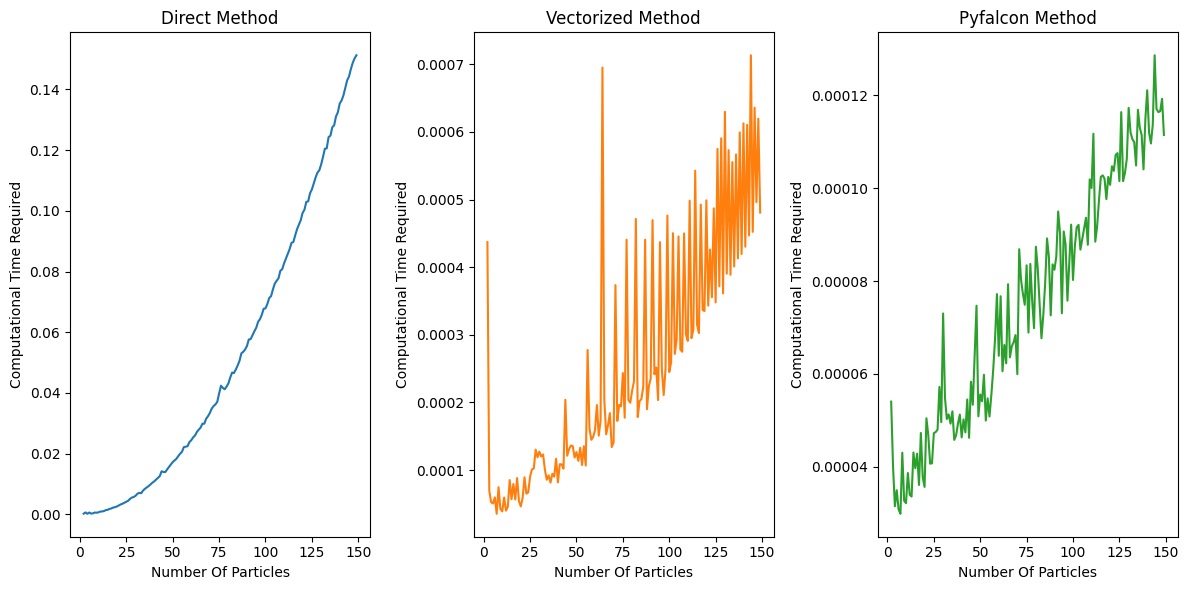

In [20]:
plt.figure(figsize=(12,6))

plt.subplot(1,3,1)
plt.title("Direct Method")
plt.plot(N, time_direct)
plt.xlabel('Number Of Particles')
plt.ylabel('Computational Time Required')

plt.subplot(1,3,2)
plt.title("Vectorized Method")
plt.plot(N, time_direct_vectorized, c="C1")
plt.xlabel('Number Of Particles')
plt.ylabel('Computational Time Required')

plt.subplot(1,3,3)
plt.title("Pyfalcon Method")
plt.plot(N, time_falcon, c="C2")
plt.xlabel('Number Of Particles')
plt.ylabel('Computational Time Required')


#plt.xscale("log")
#plt.yscale("log")
plt.tight_layout()
plt.show()


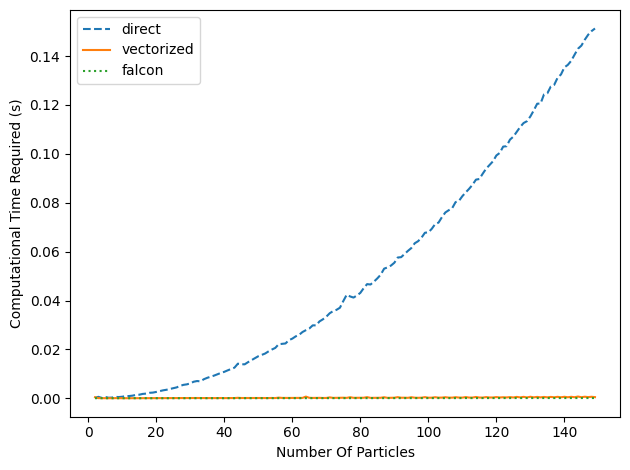

In [21]:
plt.plot(N, time_direct, label='direct', linestyle='dashed')
plt.plot(N, time_direct_vectorized, label='vectorized')
plt.plot(N, time_falcon, label='falcon', linestyle='dotted')
plt.xlabel('Number Of Particles')
plt.ylabel('Computational Time Required (s)')
plt.legend()
plt.tight_layout()
plt.show()

# COMMENTS
These results are in line with the theoretical expectations. In fact, while for a low number of particles the three method require almost the same time, as $N_{part}$ increases $t_{required}$ increases. Naturally, the time required to run the direct method is always higher with respect to the others due to the presence of the for cycles, which are responsible for the powerlaw increase at large $N$. In particular, we can see that, looking at the time complexity of the codes, while for the vectorized and pyfalcon methods this increases linearly ($\propto N$), for what concernes the direct method the increase follows a powerlaw ($\propto N^2$).
In order to analize the realistic maximum number of particles for each method, we have to see which is the complexity of the problem we are analyzing. Once we do that, It is enough to multiply it by the time required by the machine to go through the code just once. 
We can fix the time threshold as 12 hours (arbitrary). This will lead us to find $N_{max}$ for each operation. 

Before going further, we note that to compute the time required to run the cycle just once we used not the data for the 2 particles, but the one for 100 particles. In fact, when doing the computation for the 2 particles, the values of the time were similar for the different methods, and each time we run the code, the outputs were slightly different, although the seed inserted at the beginning. This is the reason why we decided to use the $100^{th}$ value.

Let's analize the three methods one by one. 

 



1) DIRECT METHOD:
In this case we have 2 for cycles. So, if we have N particles we have to compute $N(N-1) \approx N^2$ operations (in accordance with the figure).
Therefore, we have to find the time required to run the problem with 100 particles (10000 operations); then we have to divide this number by 10000 because we are looking for the time required to run the cycles just once. Afterwards, we have to multiply this time by the time complexity of the problem. 
Finally, we have to divide the $t_{max} = 12 h = 43200 s$ by the time we just found to get $N_{max}$.

In [22]:
t_max   = 43200
t       = time_direct[100]
t1      = t / (100**2)
N_max   = int(t_max/t1)

print("time required for 2 particles = ", t)
print("time required to run the cycles just once = ", t1)
print("realistic maximum nuber of particles = ", N_max)

time required for 2 particles =  0.07127487499928975
time required to run the cycles just once =  7.127487499928975e-06
realistic maximum nuber of particles =  6061041846


Therefore, $N_{max}$ (direct method)$\approx (6÷7) * 10^9$

2. VECTORIZED METHOD: 
In this case the complexity of the problem is $N$; therefore is enough to multiply N by the time required to run the problem with 2 particles, and devide $t_{max}$ by the result. This lead us to the following result:

In [23]:
t_max   = 43200
t       = time_direct_vectorized[100] 
t1      = t / 100
N_max   = int(t_max/t1)

print("time required for 2 particles = ", t)
print("realistic maximum nuber of particles = ", N_max)

time required for 2 particles =  0.00045029200009594206
realistic maximum nuber of particles =  9593774704


Therefore, $N_{max}$ (direct method)$\approx (1÷2) * 1^{10}$

3. PYFALCON METHOD:
In ths case, doing exactly as before, we get:

In [24]:
t_max   = 43200
t       = time_falcon[100]
t1      = t / 100
N_max   = int(t_max/t1)

print("time required for 2 particles = ", t)
print("realistic maximum nuber of particles = ", N_max)

time required for 2 particles =  9.15830005396856e-05
realistic maximum nuber of particles =  47170326092


Therefore, $N_{max}$ (direct method)$\approx (5÷6) * 10^{10}$

Naturally, if we want to simulate the dynamics of galaxies with $N > 10^{11}$, we should use non-collisional tools, as the Collisionless Boltzmann Equation and the Jeans Equations.